Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

Metric
Your score is the percentage of passengers you correctly predict. This is known as accuracy.

Submission File Format
You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)

The learning journal 

1. Since the train are mostly labeled (e.g survived or not, male or female and etc) , this should be a typical supervised learning for most parts
2. At a first glance, this will be a regression model that predict the survival rate based on the features

In [29]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [30]:
# understanding your train
train = pd.read_csv(r"C:\Users\Yong Ren\Documents\Jupyter\Titanic\train.csv")
test = pd.read_csv(r"C:\Users\Yong Ren\Documents\Jupyter\Titanic\test.csv")
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [31]:
test.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


EDA for the train data

In [32]:
train.shape

(891, 12)

In [33]:
test.shape

(418, 11)

In [34]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
# filling the empty age with 0 and since embarked and fare have very little missing values, i'll just drop it
train['Age'] = train['Age'].fillna(0)
test[['Age','Fare']] = test[['Age','Fare']].fillna(0)
train.dropna(subset=['Embarked'], inplace=True)

In [37]:
train['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [38]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,23.740349,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,17.562609,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,6.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


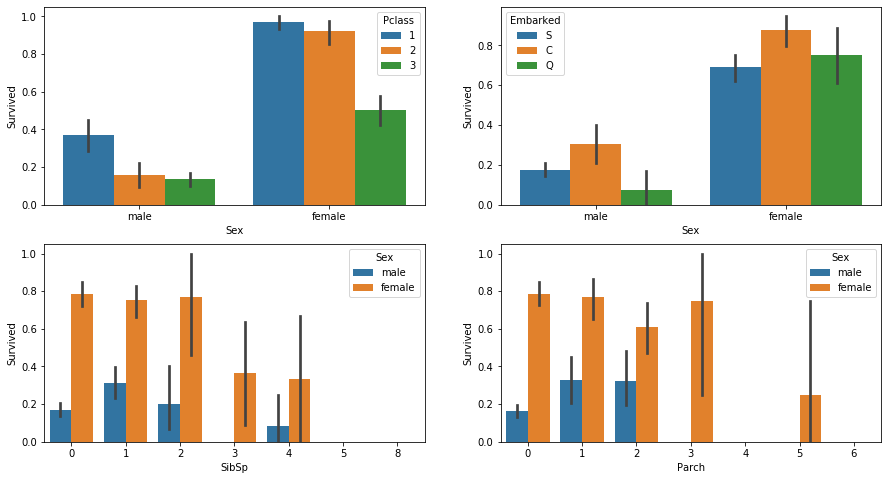

In [39]:
f, axes = plt.subplots(2,2, figsize = (15,8))

sns.barplot(x="Sex", y="Survived", hue = "Pclass", data = train, ax = axes[0,0])
sns.barplot(x="Sex", y="Survived", hue= "Embarked",  data = train, ax = axes[0,1])
sns.barplot(x="SibSp", y="Survived", hue= "Sex", data = train, ax = axes[1,0])
sns.barplot(x="Parch", y="Survived", hue= "Sex",  data = train, ax = axes[1,1])

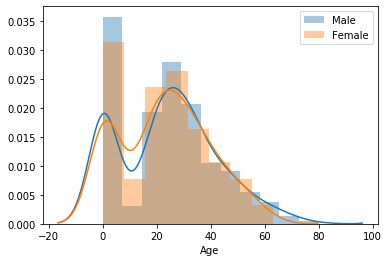

In [40]:
male = train[train['Sex'] == "male"]
female = train[train['Sex'] == 'female']
sns.distplot(male['Age'], kde = True, label = "Male")
sns.distplot(female['Age'], kde = True, label = "Female")
plt.legend()

So at this point, we can see that there is a correlationship in each of the plot (s-rate  = survival-rate), which if you have watch the movie, the train should show that woman, children and upper class having given the priority to board the life-saving boat first

1. s-rate of female is higher than male
2. s-rate of Pclass decreasing which indcate that s-rate decreasing with the socio-economic status
3. For passengers with family, the male survival rate is significantly lower than female while it get close to 0 for family
group of 3 or more
4. For family with silbing or parents onboard with <= 3 family members , their survival rate is higher too. 

In [41]:
male[male['Survived'] == 1].count()

PassengerId    109
Survived       109
Pclass         109
Name           109
Sex            109
Age            109
SibSp          109
Parch          109
Ticket         109
Fare           109
Cabin           45
Embarked       109
dtype: int64

In [42]:
female[female['Survived']==1].count()

PassengerId    231
Survived       231
Pclass         231
Name           231
Sex            231
Age            231
SibSp          231
Parch          231
Ticket         231
Fare           231
Cabin           89
Embarked       231
dtype: int64

Feature Engineering

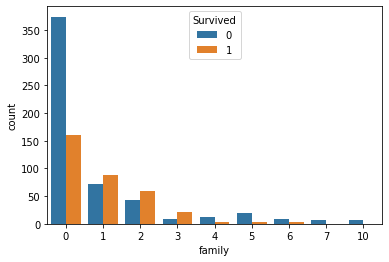

In [43]:
# Feature Engineering - creating a new feature for the total no. of family members
# credit from https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial?scriptVersionId=27280410
train['family'] = train['SibSp'] + train['Parch']
test['family'] = test['SibSp'] + test['Parch']
sns.countplot(x = "family", hue = "Survived", data =train)

Main

In [55]:
# Spliting into X and Y feature for training set and X_test
X_train = train.drop(['Cabin','Survived', 'SibSp', 'Parch', 'Name' , 'Ticket'], axis = 'columns')
y_train = train['Survived']
X_test = test.drop(['Cabin', 'SibSp', 'Parch', 'Name' , 'Ticket'], axis = 'columns')
X_train.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
Embarked        object
family           int64
dtype: object

In [56]:
X_test.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
Embarked        object
family           int64
dtype: object

In [57]:
# Feature transformation
cat_features = ['Pclass', 'Sex', 'family', 'Embarked']
numerical_features = ['Age','Fare']
# apply multiple preprocessor on different features

preprocess = make_column_transformer(
                (OneHotEncoder(), cat_features),
                (StandardScaler(), numerical_features))

# define RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=500, max_depth = 5, random_state = 2, criterion = 'gini')

# apply the preprocess with pipeline using RFC
pipe = make_pipeline(preprocess, random_forest)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

In [58]:
y_pred.shape

(418,)

In [63]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred})

In [65]:
submission.to_csv("Titanic - Machine Learning from Disaster", index=False)